In [34]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn import linear_model

In [35]:
mat = cv2.imread("../train/lenna.bmp",0);
mat = cv2.normalize(mat.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)
LR = cv2.resize(mat,(0,0),fx=0.5,fy=0.5);
HR = mat;

#Upscaling
LR = cv2.resize(LR,HR.shape,2,2,cv2.INTER_LINEAR)

In [36]:
# Set the train map
xP = yP = 5
count = 0
Q = np.zeros((4,11*11,11*11))
V = np.zeros((4,11*11,1))
h = np.zeros((4,11*11))
while(xP<LR.shape[0]-6):
    while(yP<LR.shape[1]-6):
        patch = LR[xP-5:xP+6,yP-5:yP+6]
        A = patch.reshape(1,-1)
        t = xP%2*2+yP%2
        Q[t] += A*A.T
        V[t] += A.T*HR[xP][yP]
        
        yP+=1;
    xP+=1;

In [37]:
# Set the train step
for t in range(4):
    reg = linear_model.Ridge (alpha = .005,solver='sparse_cg')
    reg.fit(Q[1],V[1])
    h[t]=reg.coef_

In [48]:
#Applying
xP = yP = 5
LRDirect = LR
while(xP<LR.shape[0]-6):
    while(yP<LR.shape[1]-6):
        patch = LR[xP-5:xP+6,yP-5:yP+6]
        A = patch.reshape(1,-1)
        t = xP%2*2+yP%2
        hh = np.matrix(h[t])
        LRDirect[yP][xP] = hh*A.T
        yP+=1;
    xP+=1;

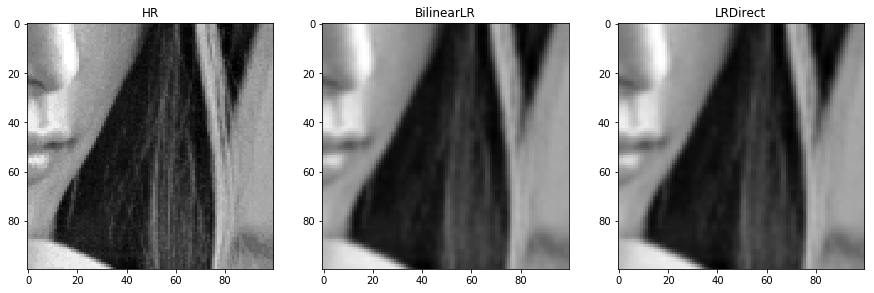

In [49]:
fig, axes = plt.subplots(ncols=3,figsize=(15,10))
axes[0].imshow(HR[300:400,300:400],'gray')
axes[0].set_title('HR')

axes[1].imshow(LR[300:400,300:400],'gray')
axes[1].set_title('BilinearLR')

axes[2].imshow(LRDirect[300:400,300:400],'gray')
axes[2].set_title('LRDirect')

fig.savefig("../fig.png")